# EXPLORATORY DATA ANALYSIS

The data set is obtained from kaggle.com about the Job Market data set of India..

# Loading  the Dataset

In [4]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
sn.set_theme(context='paper')#,style='darkgrid')
plt.style.use('seaborn-v0_8-paper')
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
#loading the data...
df=pd.read_csv('/home/ada/Downloads/indjobmark/india_job_market_dataset.csv')
df.head(5)

Job ID            Job Title Company Name Job Location    Job Type  \
0   JOB1    Software Engineer       Amazon    Ahmedabad   Full-time   
1   JOB2  Marketing Executive      Infosys    Ahmedabad  Internship   
2   JOB3    Financial Analyst     Deloitte       Jaipur    Contract   
3   JOB4     Business Analyst       Amazon        Delhi   Full-time   
4   JOB5    Software Engineer      Infosys        Delhi   Full-time   

  Salary Range Experience Required Posted Date Application Deadline  \
0      5-8 LPA           2-5 years  2025-01-16           2025-01-25   
1      5-8 LPA           2-5 years  2024-12-25           2025-01-19   
2      20+ LPA          5-10 years  2025-01-22           2025-01-29   
3      20+ LPA           2-5 years  2025-01-07           2025-02-06   
4    12-20 LPA           10+ years  2024-12-26           2025-01-08   

   Job Portal  Number of Applicants Education Requirement  \
0    LinkedIn                    23                   PhD   
1      Indeed                   462                   MBA   
2  Naukri.com                   430                M.Tech   
3    LinkedIn                   387                B.Tech   
4      Indeed                   199                   MBA   

                  Skills Required Remote/Onsite  Company Size  
0                C++, SQL, Python        Remote  Small (1-50)  
1                SQL, C++, Python        Remote  Large (500+)  
2  Machine Learning, Excel, React        Remote  Large (500+)  
3   Machine Learning, Python, SQL        Hybrid  Small (1-50)  
4                UI/UX, C++, Java        Onsite  Small (1-50)

In [6]:
df.columns
print(df.columns,'\nData set contains ',len(df.columns.format()),'columns')

Index(['Job ID', 'Job Title', 'Company Name', 'Job Location', 'Job Type',
       'Salary Range', 'Experience Required', 'Posted Date',
       'Application Deadline', 'Job Portal', 'Number of Applicants',
       'Education Requirement', 'Skills Required', 'Remote/Onsite',
       'Company Size'],
      dtype='object') 
Data set contains  15 columns


Job ID : contains the serial no of id
Job Title : contains the domain of the job
Company Name : tells the name of the company posted the respective job title\nJob Location : tells the  location of the job posted\Job Type :  describes whether it is a full/partime/internship/Contractual
Salary Range :  describes the salary range expected for a given domain in the respective company
Experience Required : states the year of experience expected\nPosted Date : tells the starting date for application
Application Deadline : tells the due date for application
Job Portal : shows the job portal in which these job details are posted\nSkills Required : tells the combination of skills required for the role posted
Education Requirement : tells the level of education required
Remote/Onsite : tells whether the corresponding job's mode of presence\nCompany Size : tells employee volumes employed in the corresponding company

In [8]:
#info of the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Job ID                 20000 non-null  object
 1   Job Title              20000 non-null  object
 2   Company Name           20000 non-null  object
 3   Job Location           20000 non-null  object
 4   Job Type               20000 non-null  object
 5   Salary Range           20000 non-null  object
 6   Experience Required    20000 non-null  object
 7   Posted Date            20000 non-null  object
 8   Application Deadline   20000 non-null  object
 9   Job Portal             20000 non-null  object
 10  Number of Applicants   20000 non-null  int64 
 11  Education Requirement  20000 non-null  object
 12  Skills Required        20000 non-null  object
 13  Remote/Onsite          20000 non-null  object
 14  Company Size           20000 non-null  object
dtypes: int64(1), object

Except *Number of Applicants* which is int64 dtype, rest of them are object dtypes

# Scrubbing Data...

In [11]:
#Fixing Missing values 
df.isna().sum()

Job ID                   0
Job Title                0
Company Name             0
Job Location             0
Job Type                 0
Salary Range             0
Experience Required      0
Posted Date              0
Application Deadline     0
Job Portal               0
Number of Applicants     0
Education Requirement    0
Skills Required          0
Remote/Onsite            0
Company Size             0
dtype: int64

We can see that the dataset has no  **NA**/Null values.

In [13]:
#looking for duplicated values..
df.duplicated().sum()

0

There is no duplicated rows in the dataset as we can see..
There is **no** missing values in the dataset.

In [15]:
#Fixing Formats
df['Posted Date']=pd.to_datetime(df['Posted Date'])
df['Application Deadline']=pd.to_datetime(df['Application Deadline'])

In [16]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Job ID                 20000 non-null  object        
 1   Job Title              20000 non-null  object        
 2   Company Name           20000 non-null  object        
 3   Job Location           20000 non-null  object        
 4   Job Type               20000 non-null  object        
 5   Salary Range           20000 non-null  object        
 6   Experience Required    20000 non-null  object        
 7   Posted Date            20000 non-null  datetime64[ns]
 8   Application Deadline   20000 non-null  datetime64[ns]
 9   Job Portal             20000 non-null  object        
 10  Number of Applicants   20000 non-null  int64         
 11  Education Requirement  20000 non-null  object        
 12  Skills Required        20000 non-null  object        
 13  R

Now the columns **posted date and applicaition deadline** are fixed to datatype of datetime[ns]

# Exploring the data..

In [19]:
#size,shape,dimension of the dataset...
m,n=df.shape
print(f'''Shape of the data set : {df.shape} (i.e.,) \nNo. of rows in the dataset : {m}\nNo. of columns in the dataset : {n}\nNo. of entries in the dataset : {df.size}\nMemory used for the data : \n{df.memory_usage()}
The dimensions of the dataset : {df.ndim}
''')

Shape of the data set : (20000, 15) (i.e.,) 
No. of rows in the dataset : 20000
No. of columns in the dataset : 15
No. of entries in the dataset : 300000
Memory used for the data : 
Index                       132
Job ID                   160000
Job Title                160000
Company Name             160000
Job Location             160000
Job Type                 160000
Salary Range             160000
Experience Required      160000
Posted Date              160000
Application Deadline     160000
Job Portal               160000
Number of Applicants     160000
Education Requirement    160000
Skills Required          160000
Remote/Onsite            160000
Company Size             160000
dtype: int64
The dimensions of the dataset : 2



In [20]:
print(df.nunique())

Job ID                   20000
Job Title                   10
Company Name                10
Job Location                10
Job Type                     4
Salary Range                 5
Experience Required          4
Posted Date                 31
Application Deadline        54
Job Portal                   3
Number of Applicants       491
Education Requirement        5
Skills Required            720
Remote/Onsite                3
Company Size                 3
dtype: int64


In [21]:
#description about the dataset
df.describe(include='int64')

Number of Applicants
count          20000.000000
mean             256.723300
std              141.745833
min               10.000000
25%              134.000000
50%              258.000000
75%              380.000000
max              500.000000

In [22]:
df.describe(include='object').T

count unique                     top  freq
Job ID                 20000  20000                    JOB1     1
Job Title              20000     10  Cyber Security Analyst  2085
Company Name           20000     10                  Amazon  2086
Job Location           20000     10               Hyderabad  2055
Job Type               20000      4               Part-time  5111
Salary Range           20000      5               12-20 LPA  4066
Experience Required    20000      4               10+ years  5069
Job Portal             20000      3              Naukri.com  6791
Education Requirement  20000      5                    B.Sc  4023
Skills Required        20000    720        React, SQL, Java    43
Remote/Onsite          20000      3                  Remote  6742
Company Size           20000      3            Small (1-50)  6718

# Peaked characteristics in the dataset 

In [24]:
#Job portal opted for the job opening
d=df['Job Portal'].value_counts(normalize=True)*100
d

Job Portal
Naukri.com    33.955
Indeed        33.780
LinkedIn      32.265
Name: proportion, dtype: float64

In [25]:
#Job Title of the job openings
print(df['Job Title'].value_counts(normalize=True)*100)

Job Title
Cyber Security Analyst    10.425
Marketing Executive       10.180
Graphic Designer          10.065
Financial Analyst         10.040
Product Manager           10.030
Business Analyst           9.945
Data Scientist             9.880
HR Manager                 9.870
Software Engineer          9.855
Sales Representative       9.710
Name: proportion, dtype: float64


In [26]:
#Company Name offering the job opening
print(df['Company Name'].value_counts(normalize=True)*100)

Company Name
Amazon       10.430
Wipro        10.345
HCL          10.115
Google       10.020
Deloitte      9.915
Infosys       9.905
TCS           9.895
Microsoft     9.885
Accenture     9.770
IBM           9.720
Name: proportion, dtype: float64


In [27]:
#job type chosen for the title
print(df['Job Type'].value_counts(normalize=True)*100)

Job Type
Part-time     25.555
Internship    25.425
Full-time     24.905
Contract      24.115
Name: proportion, dtype: float64


In [28]:
#job location of the job
print(df['Job Location'].value_counts(normalize=True)*100)

Job Location
Hyderabad    10.275
Bangalore    10.115
Ahmedabad    10.095
Jaipur       10.095
Chennai      10.090
Noida         9.965
Delhi         9.950
Pune          9.850
Mumbai        9.790
Kolkata       9.775
Name: proportion, dtype: float64


Education Requirement
B.Sc      20.115
B.Tech    20.070
PhD       19.970
MBA       19.930
M.Tech    19.915
Name: proportion, dtype: float64


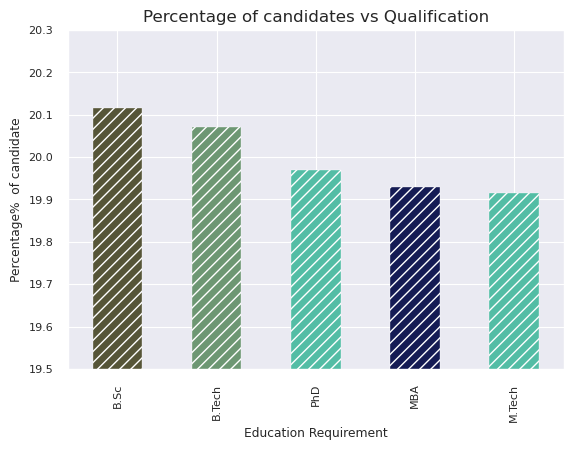

In [29]:
#Education qualification required for the job
q=df['Education Requirement'].value_counts(normalize=True)*100
print(q)
q.plot.bar(fill=True,hatch='///',color=['#565538','#6D9773','#53BDA5','#151B54','#53BDA5'])
plt.ylim((19.5,20.3))
plt.ylabel('Percentage%  of candidate')
plt.title('Percentage of candidates vs Qualification',fontsize=12)
plt.show()

In [30]:
#prior experience required for the job
print(df['Experience Required'].value_counts())

Experience Required
10+ years     5069
2-5 years     5003
0-2 years     4980
5-10 years    4948
Name: count, dtype: int64


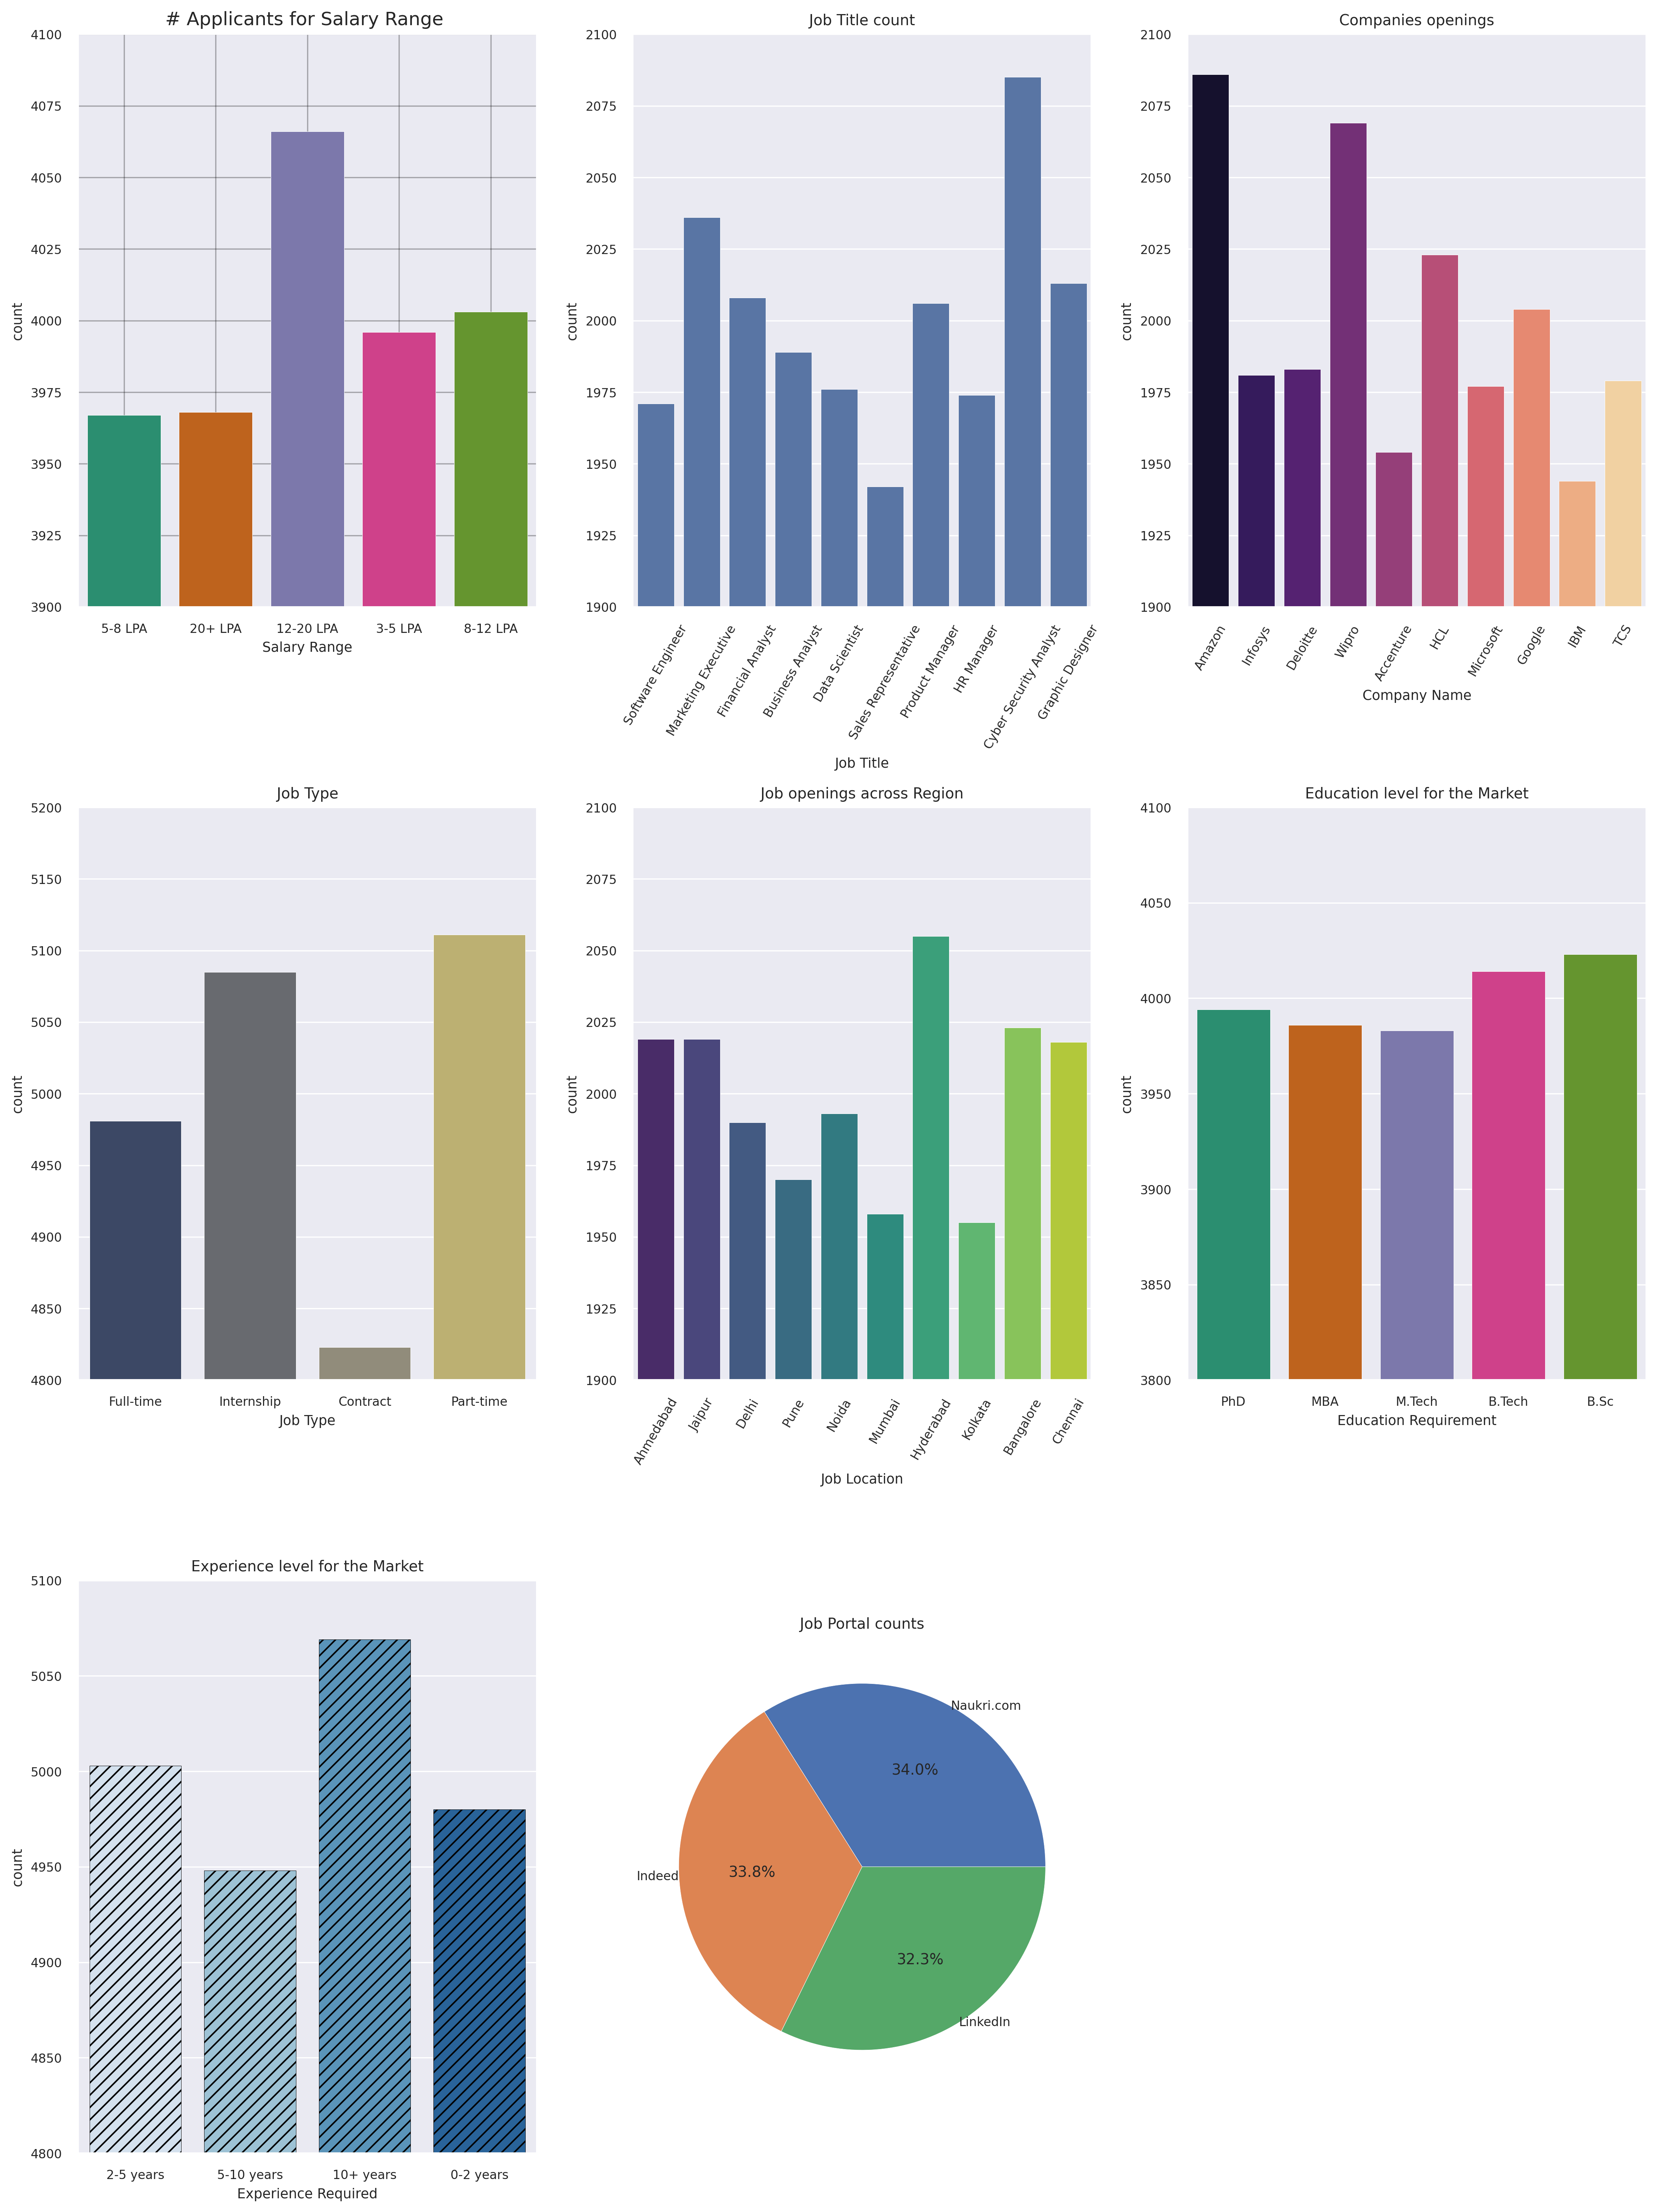

In [31]:
fig=plt.figure(figsize=(15,20),dpi=300)
ax1=fig.add_subplot(3,3,1)
ax1=sn.countplot(data=df,x='Salary Range',palette='Dark2')
plt.grid(color='black',alpha=0.3)
plt.ylim(3900,4100)
plt.title('# Applicants for Salary Range ',fontsize=12)

ax2=fig.add_subplot(3,3,2)
ax2=sn.countplot(data=df,x='Job Title')
ax2.set_title('Job Title count')
ax2.set_ylim(1900,2100)
plt.xticks(rotation=60)

ax3=fig.add_subplot(3,3,3)
ax3=sn.countplot(data=df,x='Company Name',palette='magma')
ax3.set_title('Companies openings')
ax3.set_ylim(1900,2100)
plt.xticks(rotation=60)

ax4=fig.add_subplot(3,3,4)
ax4=sn.countplot(data=df,x='Job Type',palette='cividis')
ax4.set_title('Job Type')
ax4.set_ylim(4800,5200)

ax5=fig.add_subplot(3,3,5)
ax5=sn.countplot(data=df,x='Job Location',palette='viridis')
ax5.set_title('Job openings across Region')
ax5.set_ylim(1900,2100)
plt.xticks(rotation=60)

ax6=fig.add_subplot(3,3,6)
ax6=sn.countplot(data=df,x='Education Requirement',palette='Dark2')
ax6.set_title('Education level for the Market')
ax6.set_ylim(3800,4100)

ax7=fig.add_subplot(3,3,7)
ax7=sn.countplot(data=df,x='Experience Required',palette='Blues',edgecolor='black',hatch='///')
ax7.set_title('Experience level for the Market')
ax7.set_ylim(4800,5100)

ax8=fig.add_subplot(3,3,8)
ax8.pie(d,autopct='%1.1f%%',labeldistance=1,labels=d.keys().format())
ax8.set_title('Job Portal counts')
plt.tight_layout()
plt.show()

1.12-20 LPA  is the highest posted job.

2.Cyber Security analyst is the highest posted job.

3.Amazon had the highest job openings.

4.Among the posted jobs, Partime is the most job type.

5.Hyderabad had the highest job posted location.

6.B.Sc. is the highest sought after education level.

7.10+ years are the highest experience expected among the jobs posted

8.Naukri is the highest attracted portal for job applicants.

# Companywise...

In [34]:
print('\t'*5,' COMPANY WISE PIVOTS','\n','-'*120)
#company-salary range pivot
companywise=df.pivot_table(index='Company Name',values='Number of Applicants',aggfunc='sum',columns='Salary Range')
#Applicants applied for the companies
print('COMPANY-# APPLICANTS PIVOT :\n',companywise.sum(axis=1).sort_values(ascending=False),'\n','-'*120)
print('COMPANY VS SALARY PIVOT :\n',companywise,'\n','-'*120)
#company vs experience expectation
companywise2=df.pivot_table(index='Company Name',values='Number of Applicants',columns='Experience Required',aggfunc='sum')
print('COMPANY VS EXPERIENCE RANGE :\n',companywise2)
print('-'*120)
#company vs Job mode
companywise2=df.groupby(['Company Name','Remote/Onsite'])['Number of Applicants'].sum().unstack()
print('COMPANY VS JOB MODE PIVOT :\n',companywise2)
print('-'*120)
#Applicants for the opning
companywise3=df.pivot_table(index='Company Name',values='Number of Applicants',aggfunc='mean',columns='Salary Range')
print(companywise3)

					  COMPANY WISE PIVOTS 
 ------------------------------------------------------------------------------------------------------------------------
COMPANY-# APPLICANTS PIVOT :
 Company Name
Amazon       550368
Wipro        531678
Deloitte     516859
Infosys      516186
HCL          513481
Google       510962
TCS          507456
Microsoft    505785
Accenture    494426
IBM          487265
dtype: int64 
 ------------------------------------------------------------------------------------------------------------------------
COMPANY VS SALARY PIVOT :
 Salary Range  12-20 LPA  20+ LPA  3-5 LPA  5-8 LPA  8-12 LPA
Company Name                                                
Accenture         99616    92072   102495    96509    103734
Amazon           113860   108362   111252   107329    109565
Deloitte         103943    97334   105717   111019     98846
Google           104102   104119   104846   104304     93591
HCL              105790   118558   100778    93730     94625
IBM              

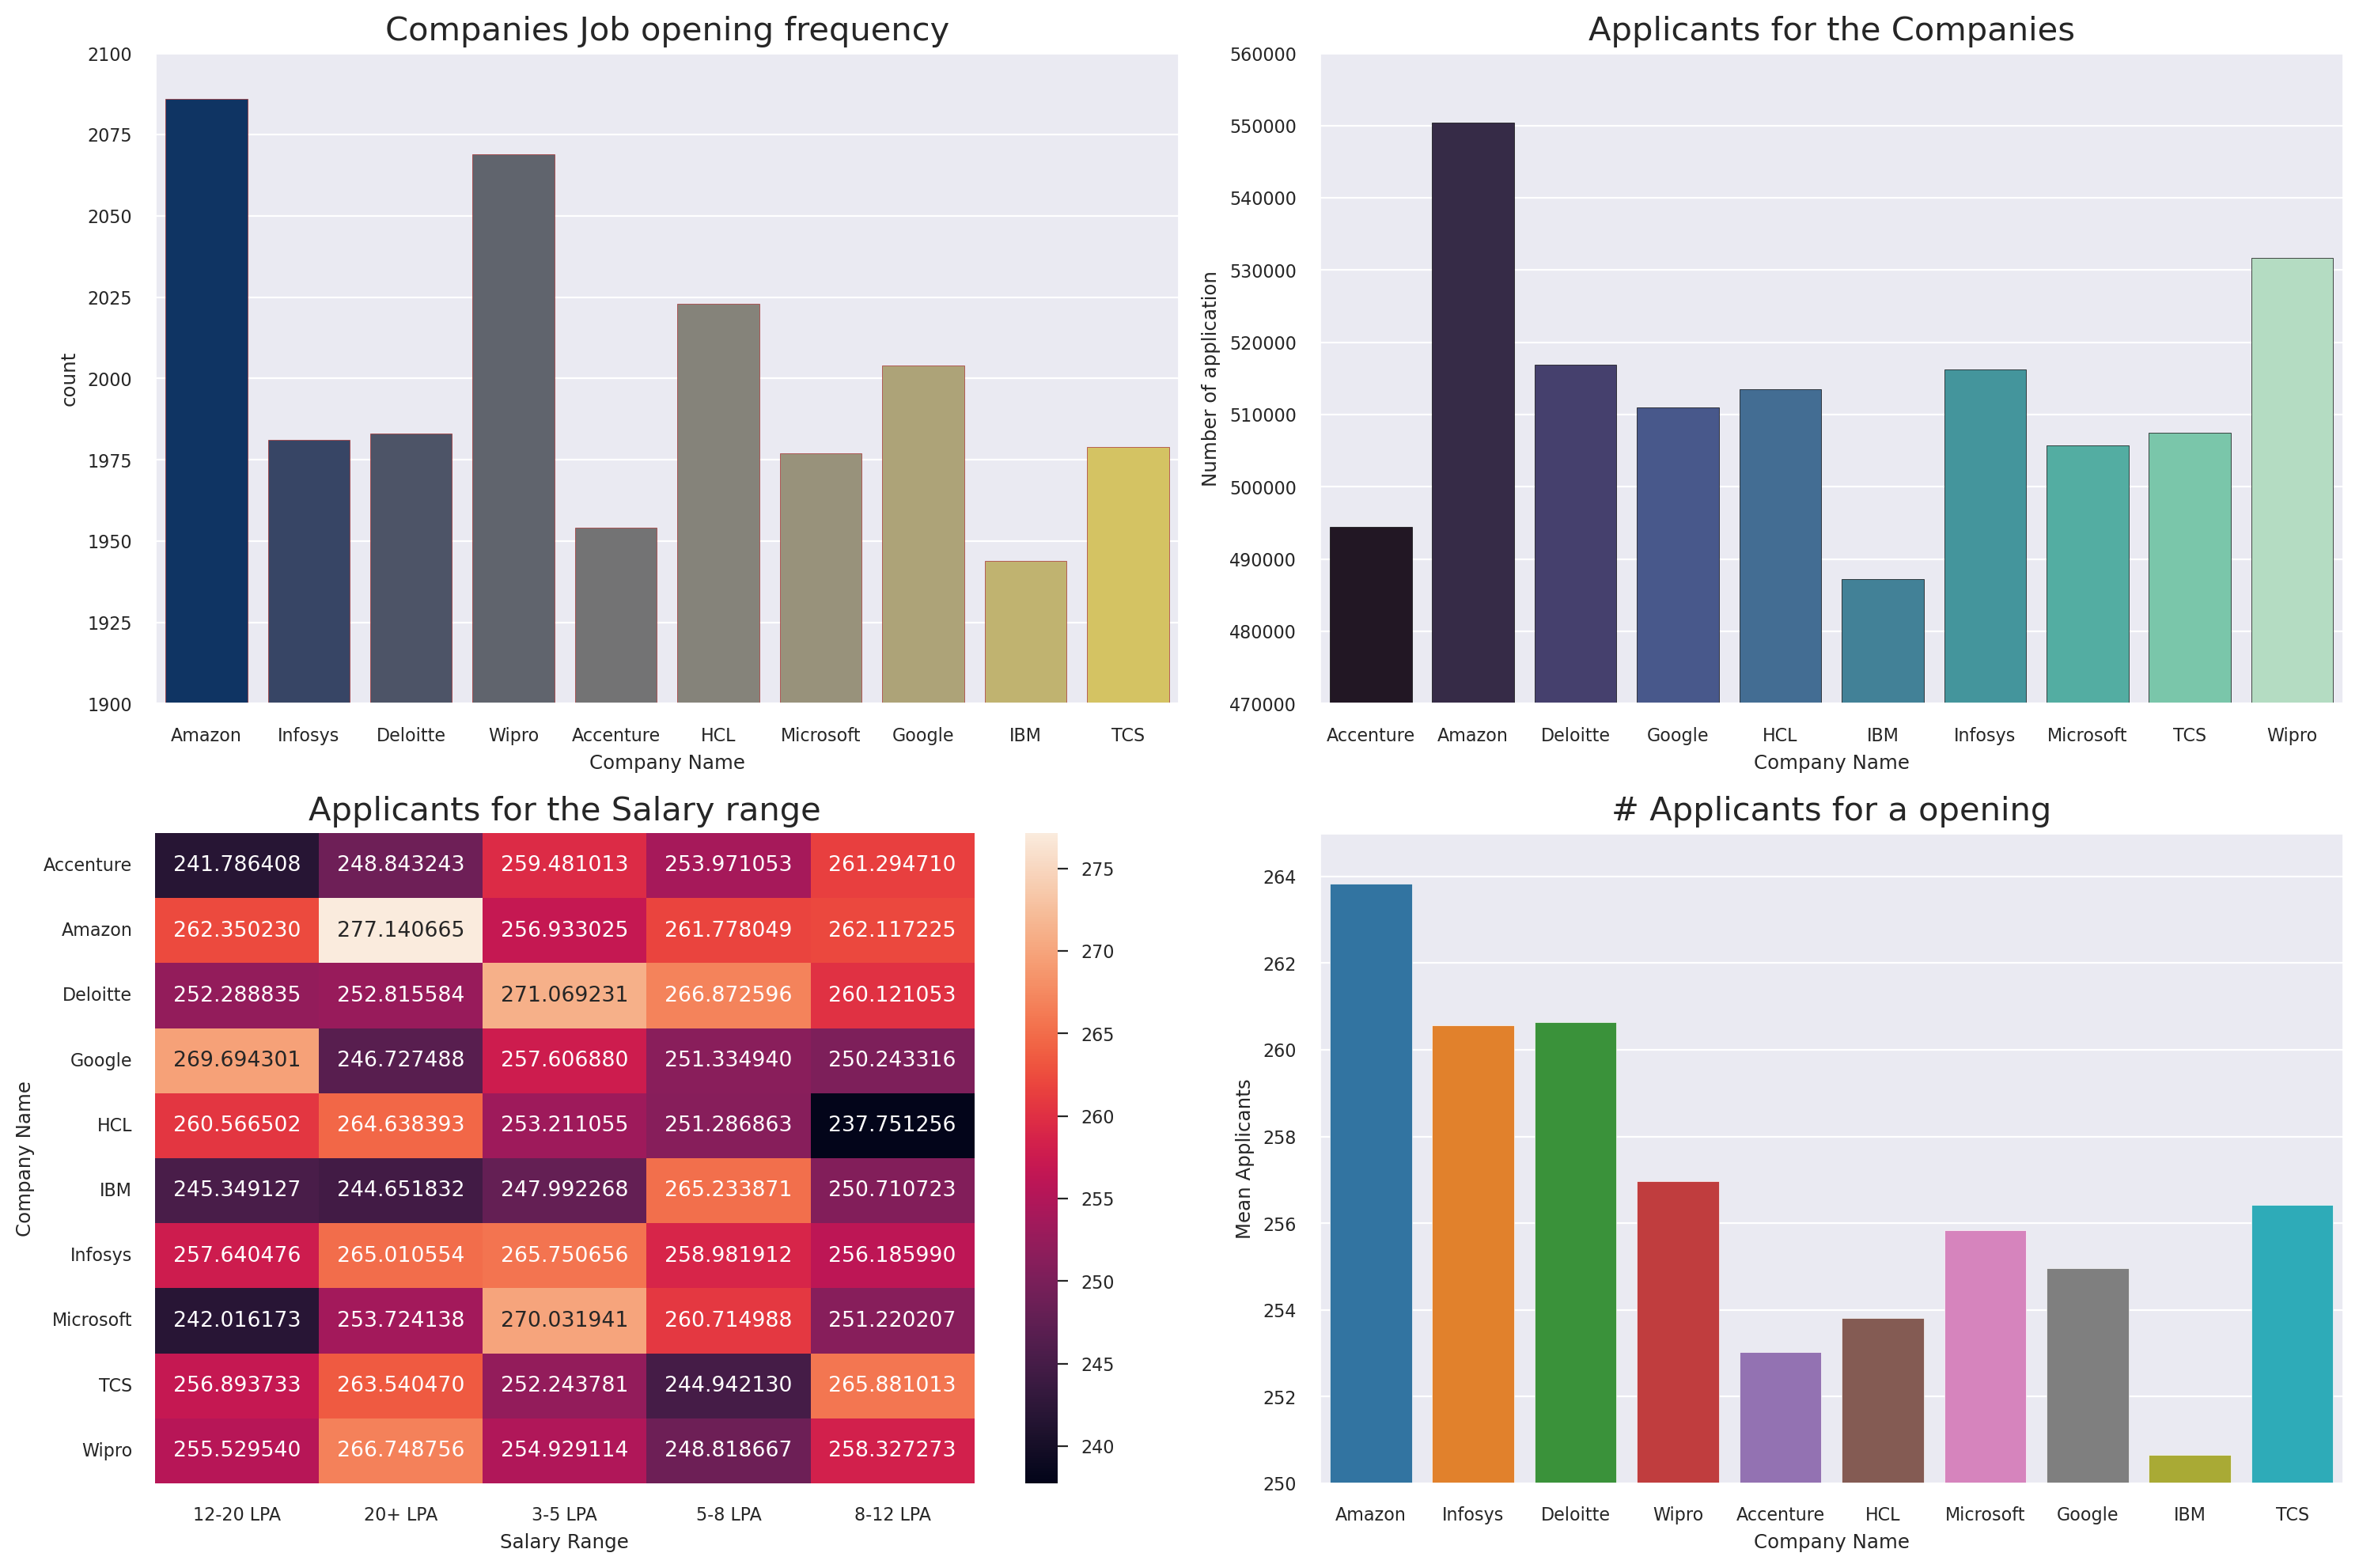

In [35]:
#Job posting frequency by the companies
fig=plt.figure(figsize=(15,10),dpi=200)
#plt.xticks(rotation=90)
ax1=fig.add_subplot(2,2,1)
#ax1.grid(alpha=0.5,color='black')
ax1=sn.countplot(data=df,x='Company Name',palette='cividis',fill=True,edgecolor='brown')
ax1.set_ylim(1900,2100)
ax1.set_title('Companies Job opening frequency',fontsize=15)

#plt.show()
# No. of applicants for a  Company
ax2=fig.add_subplot(2,2,2)
ax2.set_title('Applicants for the Companies',fontsize=15)
ax2.set_ylim(470000,560000)
ax2.set_ylabel('Number of application')
ax2=sn.barplot(companywise.sum(axis=1),palette='mako',edgecolor='black')
#ax2.grid(color='brown')

#plt.show()
#heatmap
ax3=fig.add_subplot(2,2,3)
sn.heatmap(companywise3,annot=True,fmt='f')
plt.title('Applicants for the Salary range',fontsize=15)
plt.tight_layout()

ax4=fig.add_subplot(2,2,4)
ax4=sn.barplot(data=df,x='Company Name',y='Number of Applicants',estimator='mean',errorbar=None,palette='tab10')
ax4.set_ylim(250,265)
ax4.set_title('# Applicants for a opening',fontsize=15)
ax4.set_ylabel('Mean Applicants')
plt.show()

1.Amazon had the highest amount of openings and it received the highest amount of applicants as well.

2.20+ LPA given by Amazon is the salary range that had been applied by the candidates.

3.Amazon had the highest no. of applicants per job openings which points the demandness among the applicants for it.


# Job domain wise..

In [38]:
#Job Domain demand
domainwise=df.groupby('Job Title').size().sort_values(ascending=False)
#applicants applied for a  domain
domainwise2=df.groupby('Job Title')['Number of Applicants'].sum().sort_values(ascending=False)

domain_demand=df.groupby('Job Title').agg({'Number of Applicants': 'sum','Job ID': 'count'}).rename(columns={'Job ID':'Job Freq'})
domain_demand['applicants per job']=domain_demand['Number of Applicants']/domain_demand['Job Freq']
print(domain_demand)
#applicants applied with a experience
domainwise3=df.pivot_table(values='Number of Applicants',index='Job Title',columns='Experience Required',aggfunc='mean')
domainwise3

                        Number of Applicants  Job Freq  applicants per job
Job Title                                                                 
Business Analyst                      516921      1989          259.889894
Cyber Security Analyst                526471      2085          252.504077
Data Scientist                        504324      1976          255.224696
Financial Analyst                     519232      2008          258.581673
Graphic Designer                      519718      2013          258.180825
HR Manager                            514049      1974          260.409828
Marketing Executive                   524063      2036          257.398330
Product Manager                       513424      2006          255.944167
Sales Representative                  494002      1942          254.377961
Software Engineer                     502262      1971          254.825977


Experience Required      0-2 years   10+ years   2-5 years  5-10 years
Job Title                                                             
Business Analyst        250.909091  262.607803  258.355140  267.848861
Cyber Security Analyst  253.614662  251.717557  251.822957  252.836893
Data Scientist          256.397895  254.816495  254.361538  255.405242
Financial Analyst       260.877264  255.467480  257.884837  260.096386
Graphic Designer        257.372277  255.429379  265.628692  254.878728
HR Manager              252.081370  252.965447  267.831041  267.869565
Marketing Executive     260.772643  258.125000  249.009940  261.610417
Product Manager         252.584867  258.613412  257.244618  255.192385
Sales Representative    258.872385  253.965318  252.448578  252.221311
Software Engineer       258.113281  251.661538  253.039216  256.456250

In [39]:
fig=plt.figure(figsize=(15,15),dpi=500)
ax1=fig.add_subplot(2,2,1)
ax1.grid()
ax1=sn.barplot(domainwise,palette='viridis')
ax1.set_ylim(1900,2100)
plt.xticks(rotation=65)
#ax1.grid(color='black')
ax1.set_title('JOB DOMAIN POSTING FREQUENCY',fontsize=20)
ax1.set_ylabel('Counts')
###
ax2=fig.add_subplot(2,2,2)
#ax2.grid(color='black')
ax2=sn.barplot(domainwise2,palette='tab20b')
ax2.set_title('# APPLICANTS FOR THE DOMAINS',fontsize=20)
ax2.set_ylim(490000,530000)
plt.xticks(rotation=65)
###
ax3=fig.add_subplot(2,2,3)
ax3=sn.barplot(data=df,x='Job Title',y='Number of Applicants',estimator='mean',errorbar=None,palette='tab20b')
plt.xticks(rotation=65)
ax3.set_ylim(250,265)
ax3.set_title('No. Applicants per opening in a domain',fontsize=15)

ax4=fig.add_subplot(2,2,4)
ax4=sn.heatmap(domainwise3,fmt='f',annot=True)
ax4.set_title('No. Applicants per salary range in a domain',fontsize=15)
plt.tight_layout()
plt.show()

In [40]:
edu_job_crosstab = pd.crosstab(df['Education Requirement'], df['Job Title'])

<Axes: xlabel='Education Requirement'>

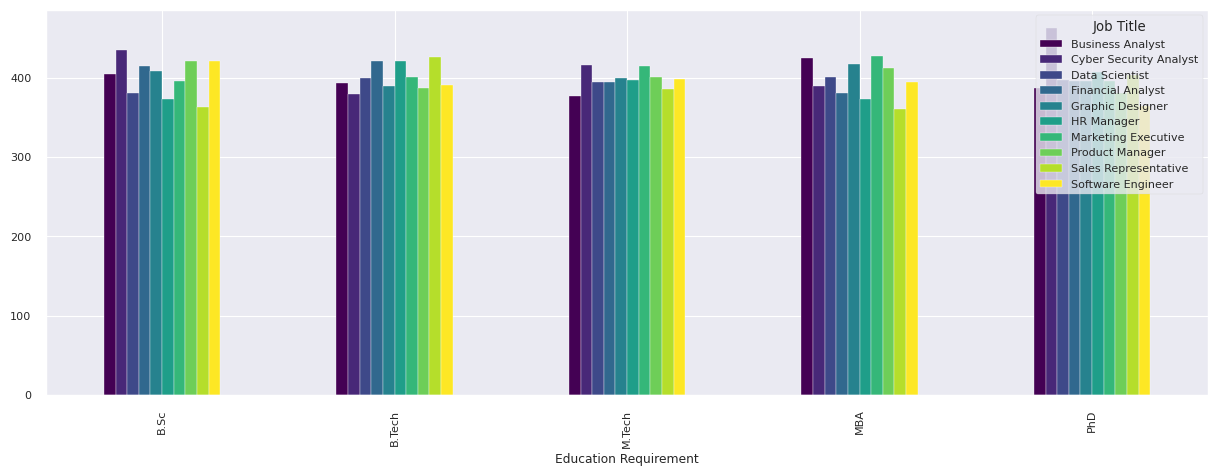

In [41]:
edu_job_crosstab.plot.bar(figsize=(15,5),colormap='viridis')

In [42]:
df.groupby(['Job Title','Education Requirement']).agg({'Number of Applicants':'mean'}).unstack()

Number of Applicants                          \
Education Requirement                  B.Sc      B.Tech      M.Tech   
Job Title                                                             
Business Analyst                 266.074074  257.586294  265.071429   
Cyber Security Analyst           255.298165  250.802632  254.084135   
Data Scientist                   251.427822  259.295000  254.587342   
Financial Analyst                254.065060  252.983373  262.832911   
Graphic Designer                 254.146699  255.161538  270.420000   
HR Manager                       265.863636  263.850711  262.108312   
Marketing Executive              249.166667  274.543641  254.154217   
Product Manager                  252.637441  255.110825  254.253731   
Sales Representative             246.991758  258.765808  253.365285   
Software Engineer                248.914489  254.271100  256.656642   

                                                
Education Requirement          MBA         PhD  
Job Title                                       
Business Analyst        253.875294  257.307494  
Cyber Security Analyst  250.138462  251.842333  
Data Scientist          248.320896  262.374372  
Financial Analyst       257.097113  266.454545  
Graphic Designer        254.734450  256.595960  
HR Manager              253.825737  256.218137  
Marketing Executive     259.271028  249.643939  
Product Manager         258.694915  259.257218  
Sales Representative    255.814404  256.079208  
Software Engineer       263.807595  250.517808

1.Cyber Security Analyst however be the highest posted and highest received job title, HR Manager be the highest sought after domain by the applicants.

2.HR Manager with 5-10 years of experience is the highest ratio of applicants opted for.


# Applicants features and Statistics

Text(0.5, 1.0, 'Applicants applied for a salary-experience range')

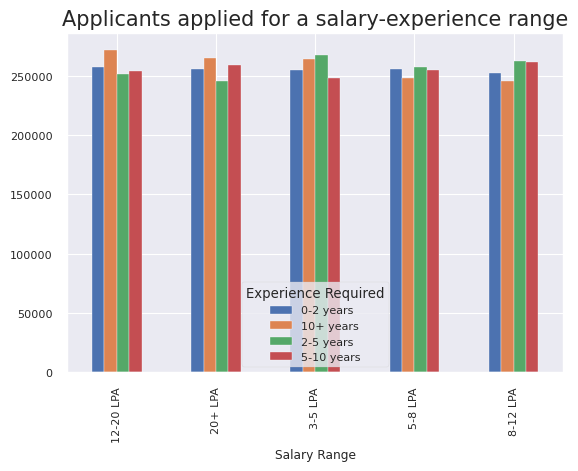

In [45]:
df.groupby(['Salary Range','Experience Required'])['Number of Applicants'].sum().unstack().plot.bar()
plt.title('Applicants applied for a salary-experience range',fontsize=15)

In [46]:
print('\t\t\t\t\t\tEDUCATION')
print(df.groupby('Education Requirement')['Number of Applicants'].sum().sort_values(ascending=False))
print('-'*120)
print('\t\t\t\t\t\tSALARY RANGE OPTED')
print(df.groupby('Salary Range')['Number of Applicants'].sum().sort_values(ascending=False))
print('-'*120)
print('\t\t\t\t\t\tJOB TYPE ACROSS APPLICANTS')
print(df.groupby('Job Type')['Number of Applicants'].sum().sort_values(ascending=False))
print('-'*120)
print('\t\t\t\t\t\tJOB TITLE vs APPLICANTS')
print(df.groupby('Job Title')['Number of Applicants'].sum().sort_values(ascending=False))
print('-'*120)
print('\t\t\t\t\t\tCOMPANY VS # APPLICANTS')
print(df.groupby('Company Name')['Number of Applicants'].sum().sort_values(ascending=False))
print('-'*120)
print('\t\t\t\t\t\tAPPLICANTS ACROSS JOB MODE')
print(df.groupby('Remote/Onsite')['Number of Applicants'].sum().sort_values(ascending=False))

						EDUCATION
Education Requirement
B.Tech    1036864
M.Tech    1030391
PhD       1024802
B.Sc      1023661
MBA       1018748
Name: Number of Applicants, dtype: int64
------------------------------------------------------------------------------------------------------------------------
						SALARY RANGE OPTED
Salary Range
12-20 LPA    1034750
3-5 LPA      1034562
20+ LPA      1025522
8-12 LPA     1022615
5-8 LPA      1017017
Name: Number of Applicants, dtype: int64
------------------------------------------------------------------------------------------------------------------------
						JOB TYPE ACROSS APPLICANTS
Job Type
Part-time     1305039
Internship    1298709
Full-time     1294566
Contract      1236152
Name: Number of Applicants, dtype: int64
------------------------------------------------------------------------------------------------------------------------
						JOB TITLE vs APPLICANTS
Job Title
Cyber Security Analyst    526471
Marketing Executive       524063
Graphic

# Regionwise Analysis...

In [48]:
d=df.groupby('Job Location').agg({'Job ID':'count','Number of Applicants':'mean'})
d

Job ID  Number of Applicants
Job Location                              
Ahmedabad       2019            260.601783
Bangalore       2023            257.485418
Chennai         2018            254.979683
Delhi           1990            263.757286
Hyderabad       2055            256.074939
Jaipur          2019            254.631996
Kolkata         1955            252.612276
Mumbai          1958            257.910623
Noida           1993            254.436026
Pune            1970            254.679695

In [49]:
df.pivot_table(values='Number of Applicants',index='Job Location',columns='Salary Range',aggfunc='mean')

Salary Range   12-20 LPA     20+ LPA     3-5 LPA     5-8 LPA    8-12 LPA
Job Location                                                            
Ahmedabad     250.107551  267.207500  269.030000  264.621622  252.432000
Bangalore     258.374702  248.629534  263.465174  253.944304  262.332542
Chennai       255.303483  263.191388  240.760705  255.642857  259.435208
Delhi         273.858852  264.819277  267.282828  260.528986  250.146974
Hyderabad     250.040302  253.478747  260.360825  260.150259  256.807780
Jaipur        245.417085  262.287500  250.538462  266.465686  248.486239
Kolkata       250.484108  245.924528  256.357702  250.113924  259.926952
Mumbai        255.686420  268.510582  253.931122  251.805699  259.952141
Noida         250.961340  256.507082  255.430155  253.119221  256.256410
Pune          253.875318  253.130000  271.251220  246.050938  247.979695

In [50]:
df.pivot_table(values='Number of Applicants',index='Job Location',columns='Job Portal',aggfunc='mean')

Job Portal        Indeed    LinkedIn  Naukri.com
Job Location                                    
Ahmedabad     262.504895  263.685127  255.677083
Bangalore     255.891496  265.523449  251.270588
Chennai       258.707463  245.823810  259.534819
Delhi         258.244220  269.245802  264.099533
Hyderabad     250.228951  257.507622  260.254848
Jaipur        254.725547  254.812785  254.361891
Kolkata       254.148670  253.450000  250.366864
Mumbai        252.463636  265.247649  256.265152
Noida         260.176383  247.434169  255.349854
Pune          250.329835  258.001548  255.829528

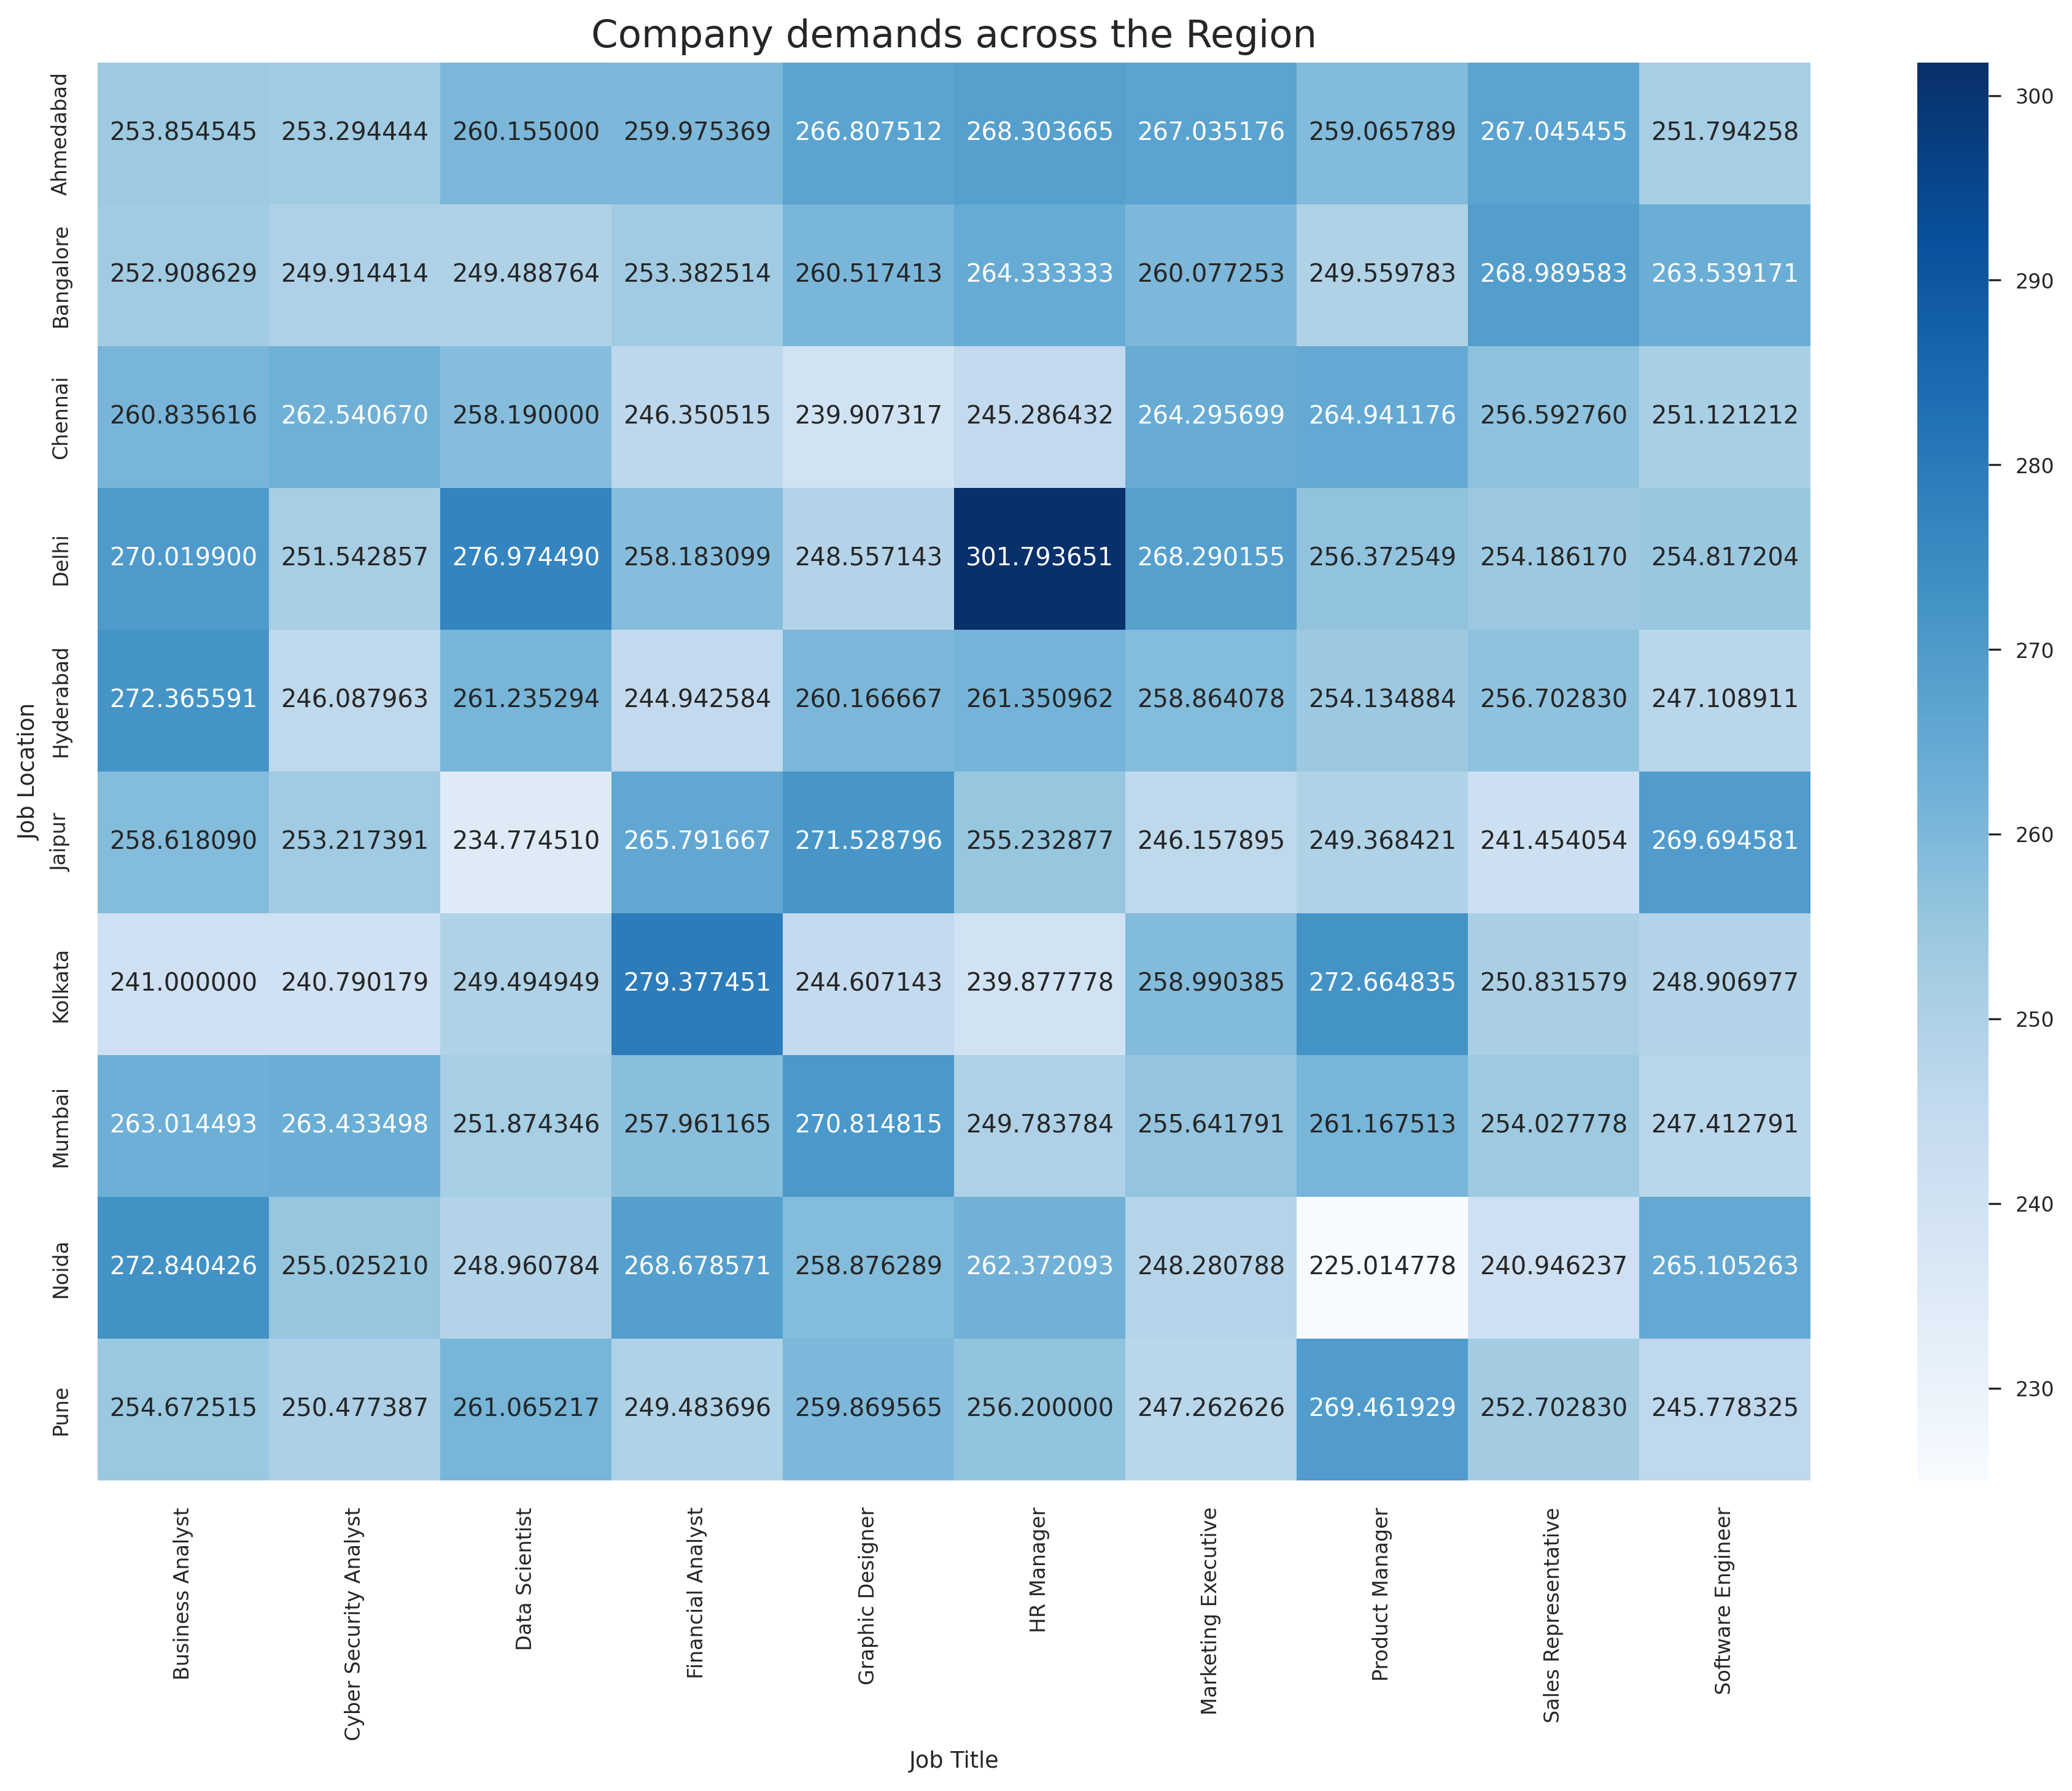

In [51]:
loc_title_app=df.pivot_table(values='Number of Applicants',index='Job Location',columns='Job Title',aggfunc='mean')
plt.figure(figsize=(15,10),dpi=300)
sn.heatmap(loc_title_app,annot=True,fmt='f',cmap='Blues')
plt.title('Company demands across the Region',fontsize=15)
plt.show()

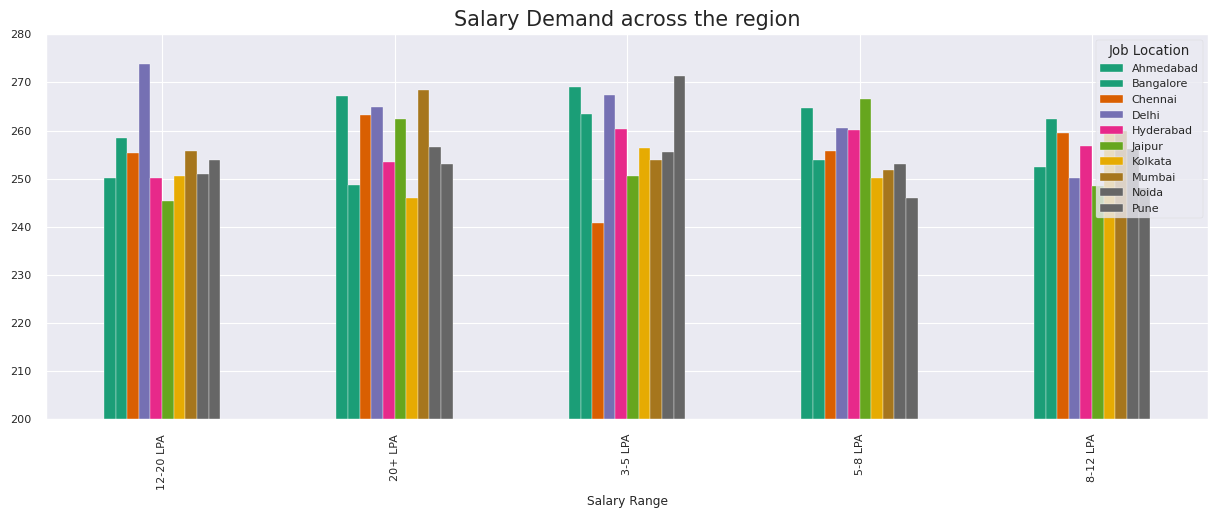

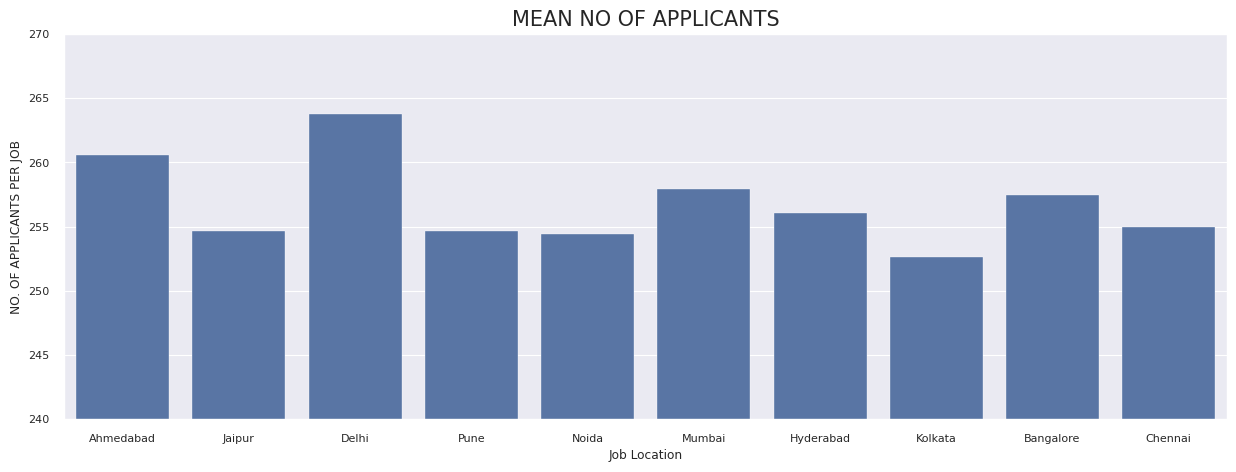

In [52]:
loc_salary=df.groupby(['Job Location','Salary Range'])['Number of Applicants'].mean().unstack()
loc_salary.T.plot(kind='bar',figsize=(15,5),colormap='Dark2')
plt.title('Salary Demand across the region',fontsize=15)
plt.ylim(200,280)
plt.show()
plt.figure(figsize=(15,5))
sn.barplot(df,x='Job Location',y='Number of Applicants',estimator='mean',errorbar=None)
plt.ylabel('NO. OF APPLICANTS PER JOB')
plt.title('MEAN NO OF APPLICANTS',fontsize=15)
plt.ylim(240,270)
plt.show()

1.Job in Graphic Designer in Delhi revceived the highest number of applicants

2.12-20 LPA job in Delhi had the highest no of applicants.

3.Ahmedabad is the region with high applicants to job ratio which means high demands in that region.

# Skills Analysis

In [55]:
df1=df.copy()
df1['Skills']=df['Skills Required'].str.split(', ')
df1=df1.explode('Skills')

In [56]:
print('SKILL DEMAND ACROSS THE MARKET\n',df1['Skills'].value_counts(),'\n','-'*120)
print('SKILLS POSSESSED BY THE CANDIDATES\n',df1.groupby('Skills')['Number of Applicants'].sum())

SKILL DEMAND ACROSS THE MARKET
 Skills
UI/UX                6138
Python               6134
Java                 6103
React                6073
C++                  5993
SQL                  5953
Excel                5951
Digital Marketing    5907
AWS                  5891
Machine Learning     5857
Name: count, dtype: int64 
 ------------------------------------------------------------------------------------------------------------------------
SKILLS POSSESSED BY THE CANDIDATES
 Skills
AWS                  1504505
C++                  1535394
Digital Marketing    1521111
Excel                1533016
Java                 1572995
Machine Learning     1496716
Python               1560614
React                1559826
SQL                  1542726
UI/UX                1576495
Name: Number of Applicants, dtype: int64


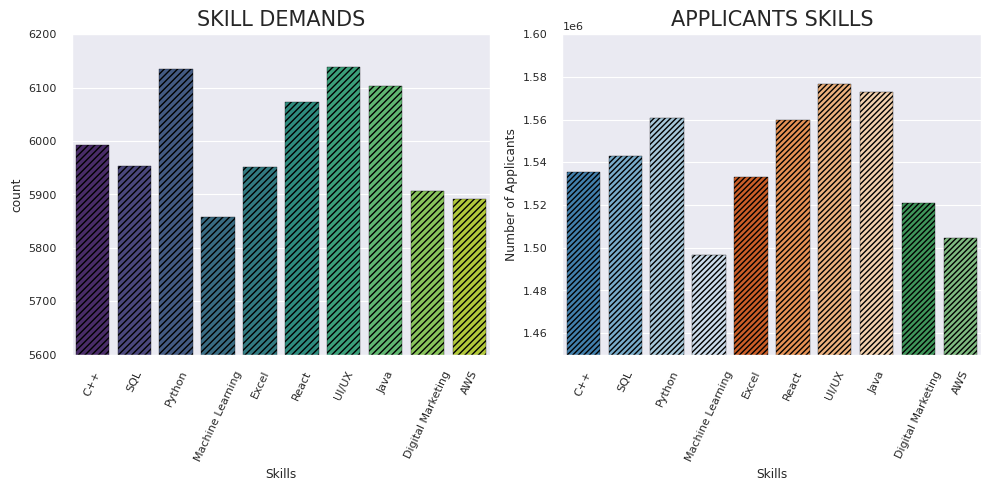

In [57]:
fig=plt.figure(figsize=(10,5))
#skill demands
ax1=fig.add_subplot(1,2,1)
ax1=sn.countplot(data=df1,x='Skills',palette='viridis',hatch='/////',edgecolor='black')
#ax1.grid(color='black')
ax1.set_ylim(5600,6200)
plt.xticks(rotation=65)
ax1.set_title('SKILL DEMANDS',fontsize=15)
#skills possesed candidates
ax2=fig.add_subplot(1,2,2)
ax2=sn.barplot(data=df1,x='Skills',y='Number of Applicants',estimator='sum',errorbar=None,palette='tab20c',hatch='//////',edgecolor='black')
ax2.set_ylim(1450000,1600000)
#ax2.grid(color='brown')
plt.xticks(rotation=65)
ax2.set_title('APPLICANTS SKILLS',fontsize=15)
plt.tight_layout()
plt.show()

In [58]:
skilldemand_in_companies=pd.crosstab(df1['Skills'],df1['Company Name'])

Text(0.5, 1.0, 'Skills Expectation ')

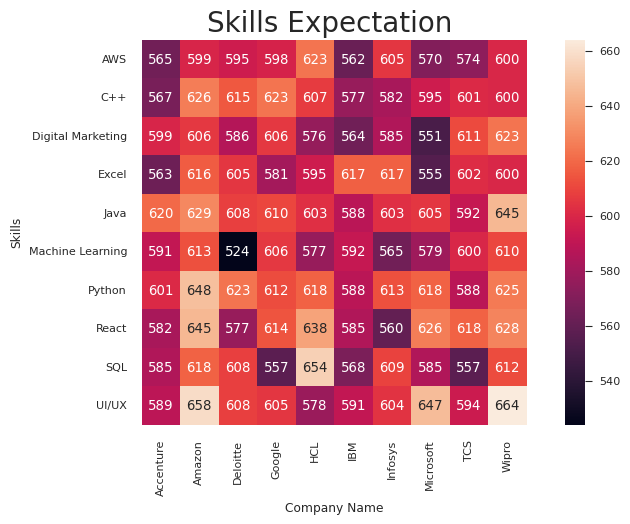

In [59]:
plt.figure(figsize=(10,5))
sn.heatmap(skilldemand_in_companies,square=True,fmt='d',annot=True)
plt.title('Skills Expectation ',fontsize=20)

Text(0.5, 1.0, 'Salary Range for the Skills')

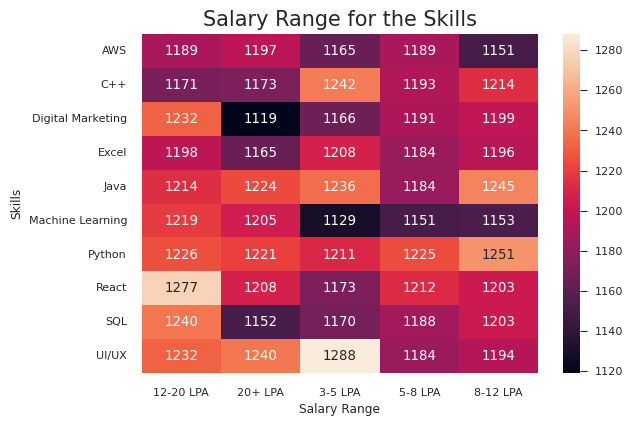

In [60]:
sn.heatmap(pd.crosstab(df1['Skills'],df1['Salary Range']),fmt='d',annot=True)
plt.title('Salary Range for the Skills',fontsize=15,)

In [61]:
skilldemand_for_title=pd.crosstab(df1['Skills'],df1['Job Title'])

Text(0.5, 1.0, 'Skills Demanded for Domain')

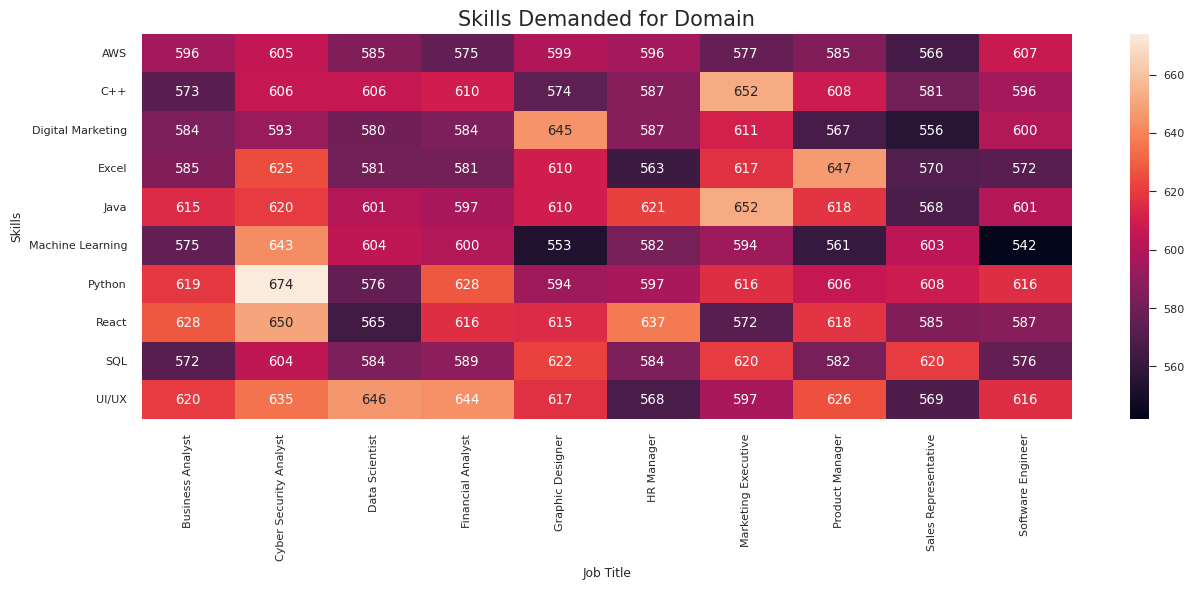

In [62]:
plt.figure(figsize=(15,5))
sn.heatmap(skilldemand_for_title,fmt='d',annot=True)
plt.title('Skills Demanded for Domain',fontsize=15)

# Analysis over the time period

In [64]:
import datetime as dt

In [65]:

posted=df.groupby('Posted Date').agg({'Job ID':'count','Number of Applicants':'sum'}).rename(columns={'Job ID':'openings'})
posted['applicants per opening']=posted['Number of Applicants']/posted['openings']
posted

openings  Number of Applicants  applicants per opening
Posted Date                                                        
2024-12-23        615                156837              255.019512
2024-12-24        663                166610              251.297134
2024-12-25        605                154493              255.360331
2024-12-26        657                172750              262.937595
2024-12-27        637                166702              261.698587
2024-12-28        617                158195              256.393841
2024-12-29        685                177548              259.194161
2024-12-30        665                170831              256.888722
2024-12-31        638                162429              254.590909
2025-01-01        616                159476              258.889610
2025-01-02        652                170313              261.216258
2025-01-03        675                166923              247.293333
2025-01-04        646                166210              257.291022
2025-01-05        649                160172              246.798151
2025-01-06        655                165879              253.250382
2025-01-07        614                162002              263.846906
2025-01-08        638                164008              257.065831
2025-01-09        663                172749              260.556561
2025-01-10        626                158913              253.854633
2025-01-11        651                168074              258.178187
2025-01-12        616                152798              248.048701
2025-01-13        622                158445              254.734727
2025-01-14        643                169302              263.300156
2025-01-15        687                176493              256.903930
2025-01-16        681                170725              250.697504
2025-01-17        640                161068              251.668750
2025-01-18        656                167712              255.658537
2025-01-19        660                176360              267.212121
2025-01-20        646                163732              253.455108
2025-01-21        658                167673              254.822188
2025-01-22        624                169044              270.903846

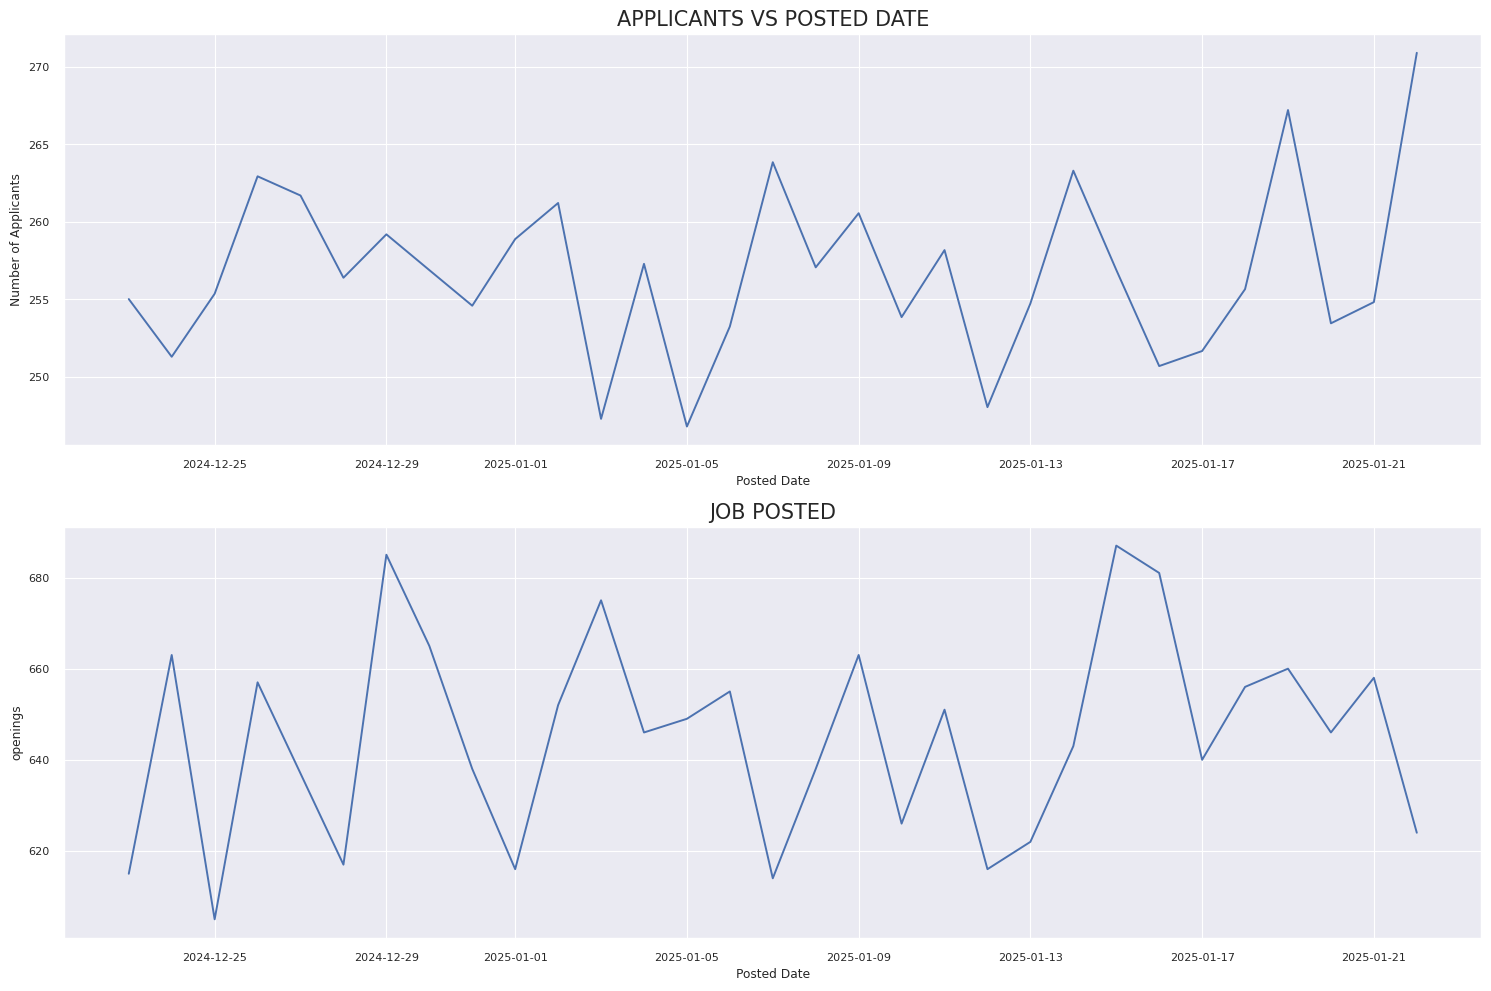

In [66]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,1,1)
ax1=sn.lineplot(data=df,x='Posted Date',y='Number of Applicants',estimator='mean',errorbar=None)
ax1.set_title('APPLICANTS VS POSTED DATE',fontsize=15)
#sn.lineplot(posted)
ax2=fig.add_subplot(2,1,2)
ax2=sn.lineplot(posted['openings'])
ax2.set_title('JOB POSTED',fontsize=15)
plt.tight_layout()
plt.show()

In [67]:
qs=df.groupby('Application Deadline').agg({'Job ID':'count','Number of Applicants':'mean'})
qs

Job ID  Number of Applicants
Application Deadline                              
2024-12-30                23            260.608696
2024-12-31                49            264.897959
2025-01-01                78            258.961538
2025-01-02               100            251.890000
2025-01-03               135            256.192593
2025-01-04               156            276.852564
2025-01-05               204            258.348039
2025-01-06               178            257.016854
2025-01-07               246            244.121951
2025-01-08               278            259.316547
2025-01-09               288            249.215278
2025-01-10               353            260.951841
2025-01-11               329            263.893617
2025-01-12               405            266.901235
2025-01-13               403            255.327543
2025-01-14               426            245.711268
2025-01-15               438            261.079909
2025-01-16               520            246.550000
2025-01-17               471            262.524416
2025-01-18               531            245.001883
2025-01-19               562            258.887900
2025-01-20               612            250.508170
2025-01-21               619            254.948304
2025-01-22               646            260.442724
2025-01-23               667            252.961019
2025-01-24               627            257.200957
2025-01-25               644            249.919255
2025-01-26               640            267.221875
2025-01-27               632            252.734177
2025-01-28               637            258.885400
2025-01-29               600            260.760000
2025-01-30               617            252.043760
2025-01-31               558            269.000000
2025-02-01               548            263.149635
2025-02-02               567            256.365079
2025-02-03               516            255.017442
2025-02-04               457            261.266958
2025-02-05               464            264.178879
2025-02-06               414            260.876812
2025-02-07               434            250.730415
2025-02-08               401            251.773067
2025-02-09               345            244.220290
2025-02-10               334            252.485030
2025-02-11               308            264.142857
2025-02-12               299            254.551839
2025-02-13               237            262.291139
2025-02-14               222            266.256757
2025-02-15               188            254.515957
2025-02-16               162            251.006173
2025-02-17               149            241.791946
2025-02-18               116            243.465517
2025-02-19                83            256.867470
2025-02-20                61            290.098361
2025-02-21                23            238.521739

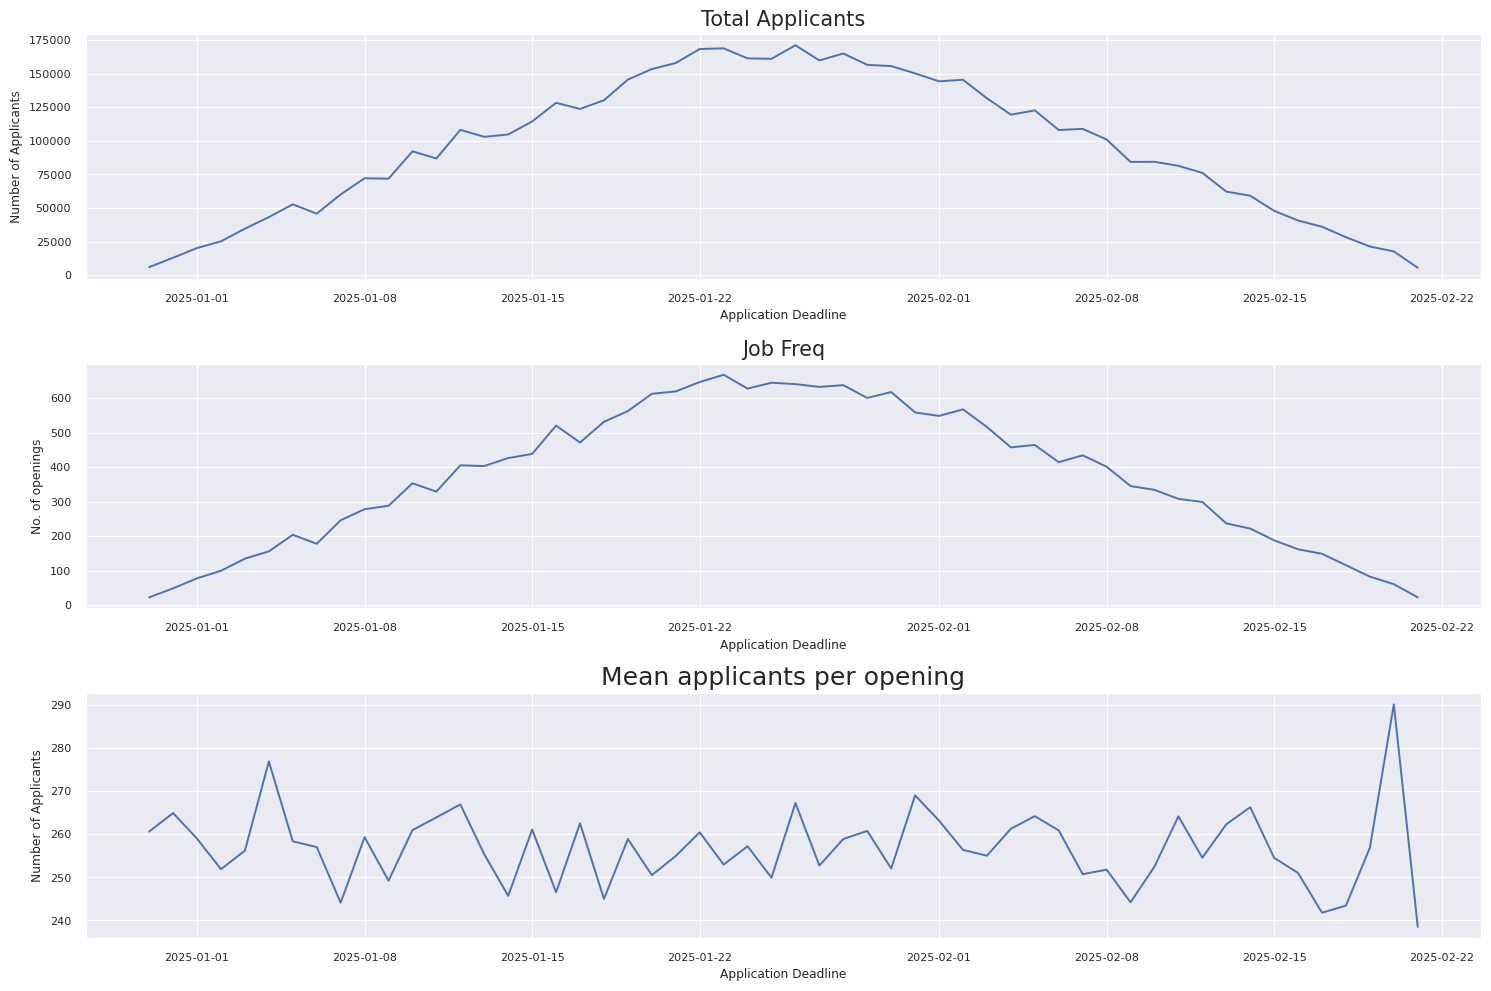

In [68]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(3,1,1)
ax1=sn.lineplot(data=df,x='Application Deadline',y='Number of Applicants',estimator='sum',errorbar=None)
ax1.set_title('Total Applicants',fontsize=15)

ax2=fig.add_subplot(3,1,2)
ax2=sn.lineplot(qs['Job ID'])
ax2.set_ylabel('No. of openings')
ax2.set_title('Job Freq',fontsize=15)

ax3=fig.add_subplot(3,1,3)
ax3=sn.lineplot(data=df,x='Application Deadline',y='Number of Applicants',estimator='mean',errorbar=None)
ax3.set_title('Mean applicants per opening',fontsize=18)
plt.tight_layout()
plt.show()

In [69]:
df['Duration']=df['Application Deadline']-df['Posted Date']

In [70]:
dur=pd.crosstab(df['Duration'],df['Company Name'])
dur

Company Name  Accenture  Amazon  Deloitte  Google  HCL  IBM  Infosys  \
Duration                                                               
7 days               85      80        72      78   90   88       82   
8 days               79      93        74      88   84   81       89   
9 days               90      89        94      72   99   80       80   
10 days              78      80        75      80   72   87       66   
11 days              87      93        88      84   66   80       84   
12 days              64      81        94      87   88   86       76   
13 days              80      70        83      92   91   83       79   
14 days              68      84        91      77   87   84       95   
15 days              81      88        79      82   76   80       82   
16 days              83      85        97      82   83   77       83   
17 days              65      77        73      69   83   95       88   
18 days              88      89        64      99   92   73       87   
19 days             104      88        89      82   94   81       83   
20 days              79      70        78      89   78   67       69   
21 days              69      82        85      94   90   75       77   
22 days              75      93        87      78   74   86       80   
23 days              92      93        81      86   91   92       92   
24 days              85      99        76      77   95   90       81   
25 days             104      91        78      83   78   84       91   
26 days              74      87        99      90   84   69       73   
27 days              85     101        82      82   78   84       88   
28 days              72      86        77      79   85   61       91   
29 days              89      89        88      78   82   80       79   
30 days              78      98        79      96   83   81       86   

Company Name  Microsoft  TCS  Wipro  
Duration                             
7 days               72   67     87  
8 days               77   70     89  
9 days               80   73    104  
10 days              88   69     87  
11 days              66   96     75  
12 days              91   71     86  
13 days              96   84    101  
14 days              74   72     69  
15 days              85   82     76  
16 days              98   85     89  
17 days              88   73     84  
18 days              98   91     89  
19 days              73  104     97  
20 days              95  100     96  
21 days              64   97     97  
22 days              78   73     77  
23 days              87   82     70  
24 days              89   75     85  
25 days              76   89     93  
26 days              93   82     73  
27 days              77  100     81  
28 days              79   80     89  
29 days              65   82     83  
30 days              88   82     92

In [71]:
dur_mean=df.groupby('Duration').agg({'Number of Applicants':'mean'})
dur_mean

Number of Applicants
Duration                      
7 days              264.671660
8 days              252.915049
9 days              254.349593
10 days             259.108696
11 days             251.312576
12 days             253.849515
13 days             259.020955
14 days             255.198502
15 days             260.297164
16 days             257.548724
17 days             257.221384
18 days             259.308046
19 days             256.772067
20 days             262.114495
21 days             252.031325
22 days             256.461923
23 days             260.612009
24 days             252.384977
25 days             264.415225
26 days             255.177184
27 days             258.635198
28 days             251.670839
29 days             255.737423
30 days             250.361530

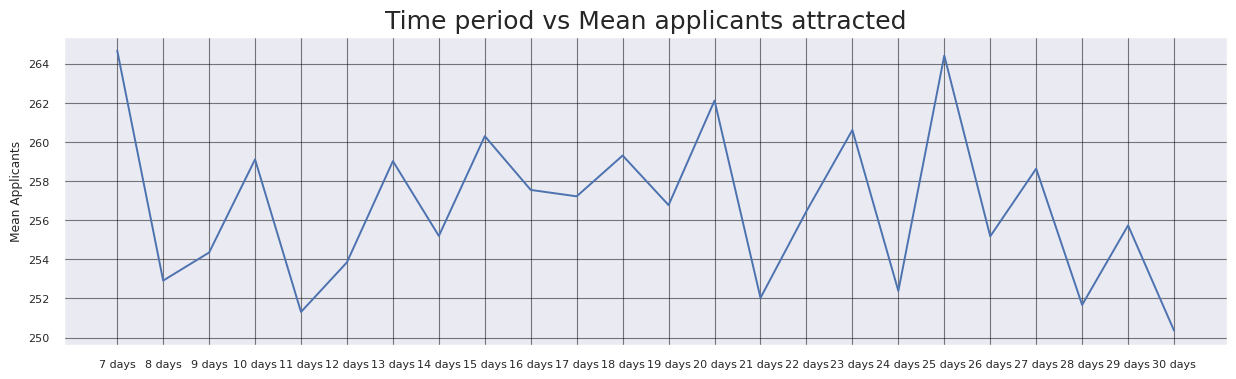

In [72]:
plt.figure(figsize=(15,4))
plt.plot(dur_mean.index.format(),dur_mean.values)
plt.grid(color='black',alpha=0.5)
plt.ylabel('Mean Applicants')
plt.title('Time period vs Mean applicants attracted',fontsize=18)
plt.show()